Extracted files: ['API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv', 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv', 'Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv']
CSV files found: ['API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv', 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv', 'Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv']
Loading data from: C:\Users\yparm\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_3189575\API_SP.POP.TOTL_DS2_en_csv_v2_3189575.csv
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1

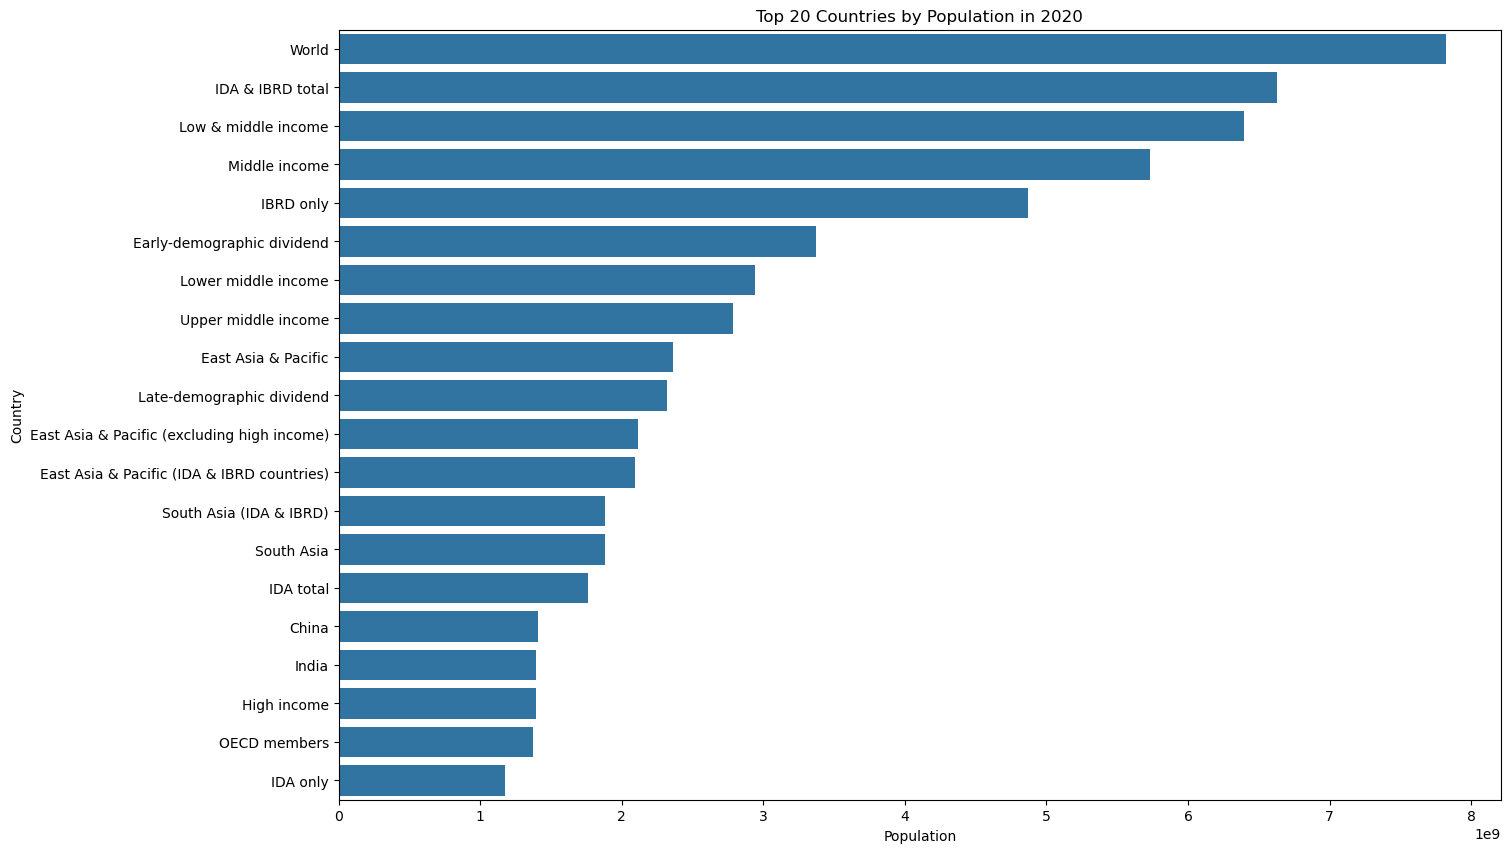

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_file_path = r'C:\Users\yparm\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_3189575.zip'
extract_dir = r'C:\Users\yparm\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_3189575'

# Create extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all files in the zip archive to the specified directory
    zip_ref.extractall(extract_dir)
    # List the files in the directory
    extracted_files = os.listdir(extract_dir)
    print("Extracted files:", extracted_files)

# Identify the CSV file to load
csv_files = [f for f in extracted_files if f.endswith('.csv')]
print("CSV files found:", csv_files)

# Load the appropriate CSV file (typically the main data file)
csv_file_path = os.path.join(extract_dir, [f for f in csv_files if 'API_SP.POP.TOTL_DS2' in f][0])
print(f"Loading data from: {csv_file_path}")

# Load the data
df = pd.read_csv(csv_file_path, skiprows=4)

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Extract relevant columns - For example, let's use population data for a specific year
# Adjust the column names based on your dataset
years = [str(year) for year in range(1960, 2021)]  # Example years

# Filter columns that are years and drop rows with NaN values
df_years = df[['Country Name'] + years]
df_years = df_years.dropna()

# Let's focus on a specific year for visualization
year_of_interest = '2020'
df_years = df_years.rename(columns={year_of_interest: 'Population'})
df_years = df_years[['Country Name', 'Population']]
df_years = df_years[df_years['Population'] > 0]  # Filter out rows with zero or negative population

# Visualize the distribution of populations across countries for the year 2020
plt.figure(figsize=(15, 10))
sns.barplot(x='Population', y='Country Name', data=df_years.sort_values(by='Population', ascending=False).head(20))
plt.title('Top 20 Countries by Population in 2020')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()


In [2]:
df


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,990150.0,1014211.0,1038618.0,1063175.0,1087700.0,1111812.0,...,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1768086.0,1756374.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,34449825.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,60414495.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,20569737.0,NaN


In [3]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0,NaN


In [4]:
df.tail

<bound method NDFrame.tail of                     Country Name Country Code     Indicator Name  \
0                          Aruba          ABW  Population, total   
1    Africa Eastern and Southern          AFE  Population, total   
2                    Afghanistan          AFG  Population, total   
3     Africa Western and Central          AFW  Population, total   
4                         Angola          AGO  Population, total   
..                           ...          ...                ...   
261                       Kosovo          XKX  Population, total   
262                  Yemen, Rep.          YEM  Population, total   
263                 South Africa          ZAF  Population, total   
264                       Zambia          ZMB  Population, total   
265                     Zimbabwe          ZWE  Population, total   

    Indicator Code         1960         1961         1962         1963  \
0      SP.POP.TOTL      54608.0      55811.0      56682.0      57475.0   
1    

In [5]:
df.shape

(266, 69)

In [6]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

In [7]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2020              float64
2021              float64
2022              float64
2023              float64
Unnamed: 68       float64
Length: 69, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [9]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,0.0
mean,1.157939e+08,1.173869e+08,1.195401e+08,1.222050e+08,1.248922e+08,1.276182e+08,1.304676e+08,1.333152e+08,1.362430e+08,1.392759e+08,...,2.986442e+08,3.024871e+08,3.063370e+08,3.101259e+08,3.138348e+08,3.174293e+08,3.206783e+08,3.236218e+08,3.269710e+08,NaN
std,3.639920e+08,3.684672e+08,3.751049e+08,3.837174e+08,3.923714e+08,4.011556e+08,4.104328e+08,4.196670e+08,4.291879e+08,4.390998e+08,...,9.336474e+08,9.448081e+08,9.559803e+08,9.668651e+08,9.774204e+08,9.875137e+08,9.965683e+08,1.004474e+09,1.013469e+09,NaN
min,2.646000e+03,2.888000e+03,3.171000e+03,3.481000e+03,3.811000e+03,4.161000e+03,4.531000e+03,4.930000e+03,5.354000e+03,5.646000e+03,...,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,1.131200e+04,1.139600e+04,NaN
25%,5.132212e+05,5.231345e+05,5.337595e+05,5.449288e+05,5.566630e+05,5.651150e+05,5.691470e+05,5.773872e+05,5.832700e+05,5.875942e+05,...,1.788196e+06,1.777557e+06,1.791003e+06,1.797085e+06,1.788878e+06,1.790133e+06,1.786038e+06,1.768086e+06,1.756374e+06,NaN
50%,3.708088e+06,3.816540e+06,3.931214e+06,4.033994e+06,4.112910e+06,4.194930e+06,4.257383e+06,4.317222e+06,4.410692e+06,4.515734e+06,...,1.035808e+07,1.032545e+07,1.030030e+07,1.039533e+07,1.044767e+07,1.060623e+07,1.050577e+07,1.048694e+07,1.059380e+07,NaN
75%,2.670606e+07,2.748694e+07,2.830289e+07,2.914708e+07,3.001684e+07,3.084892e+07,3.163010e+07,3.209247e+07,3.249927e+07,3.277149e+07,...,6.073058e+07,6.062750e+07,6.053671e+07,6.042176e+07,5.987258e+07,6.170452e+07,6.358833e+07,6.549775e+07,6.743811e+07,NaN
max,3.031517e+09,3.072470e+09,3.126894e+09,3.193470e+09,3.260480e+09,3.328243e+09,3.398510e+09,3.468395e+09,3.540186e+09,3.614593e+09,...,7.404251e+09,7.490956e+09,7.577110e+09,7.661178e+09,7.742725e+09,7.821272e+09,7.888964e+09,7.951595e+09,8.024997e+09,NaN


In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum().any()

True

In [12]:
df = df.ffill()


In [13]:
df = df.bfill()


In [14]:
df.isna().sum().any()

True

In [15]:
df['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [16]:
df['Country Code'].unique()

array(['ABW', 'AFE', 'AFG', 'AFW', 'AGO', 'ALB', 'AND', 'ARB', 'ARE',
       'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
       'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ',
       'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN',
       'CEB', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG',
       'COL', 'COM', 'CPV', 'CRI', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP',
       'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR',
       'EAS', 'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST',
       'ETH', 'EUU', 'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB',
       'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC',
       'HRV', 'HTI', 'HUN', 'IBD', 'IBT', 'IDA', 'IDB', 'IDN', 'IDX',
       'IMN', 'IND', 'INX', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA',
       'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA',
       'KOR', 'KWT',

In [17]:
df['Indicator Name'].unique()

array(['Population, total'], dtype=object)

In [18]:
df['Indicator Code'].unique()

array(['SP.POP.TOTL'], dtype=object)

In [19]:
df.drop(['Indicator Name', 'Indicator Code', 'Country Code'], axis=1, inplace=True)


In [20]:
df.columns

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', 'Unnamed: 68'],
      dtype='object')

In [21]:
years = ['2017', '2018', '2019', '2020']  # Correctly closed list


In [22]:
for i in range(5):
    fig = plt.figure(figsize=(5,5))


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

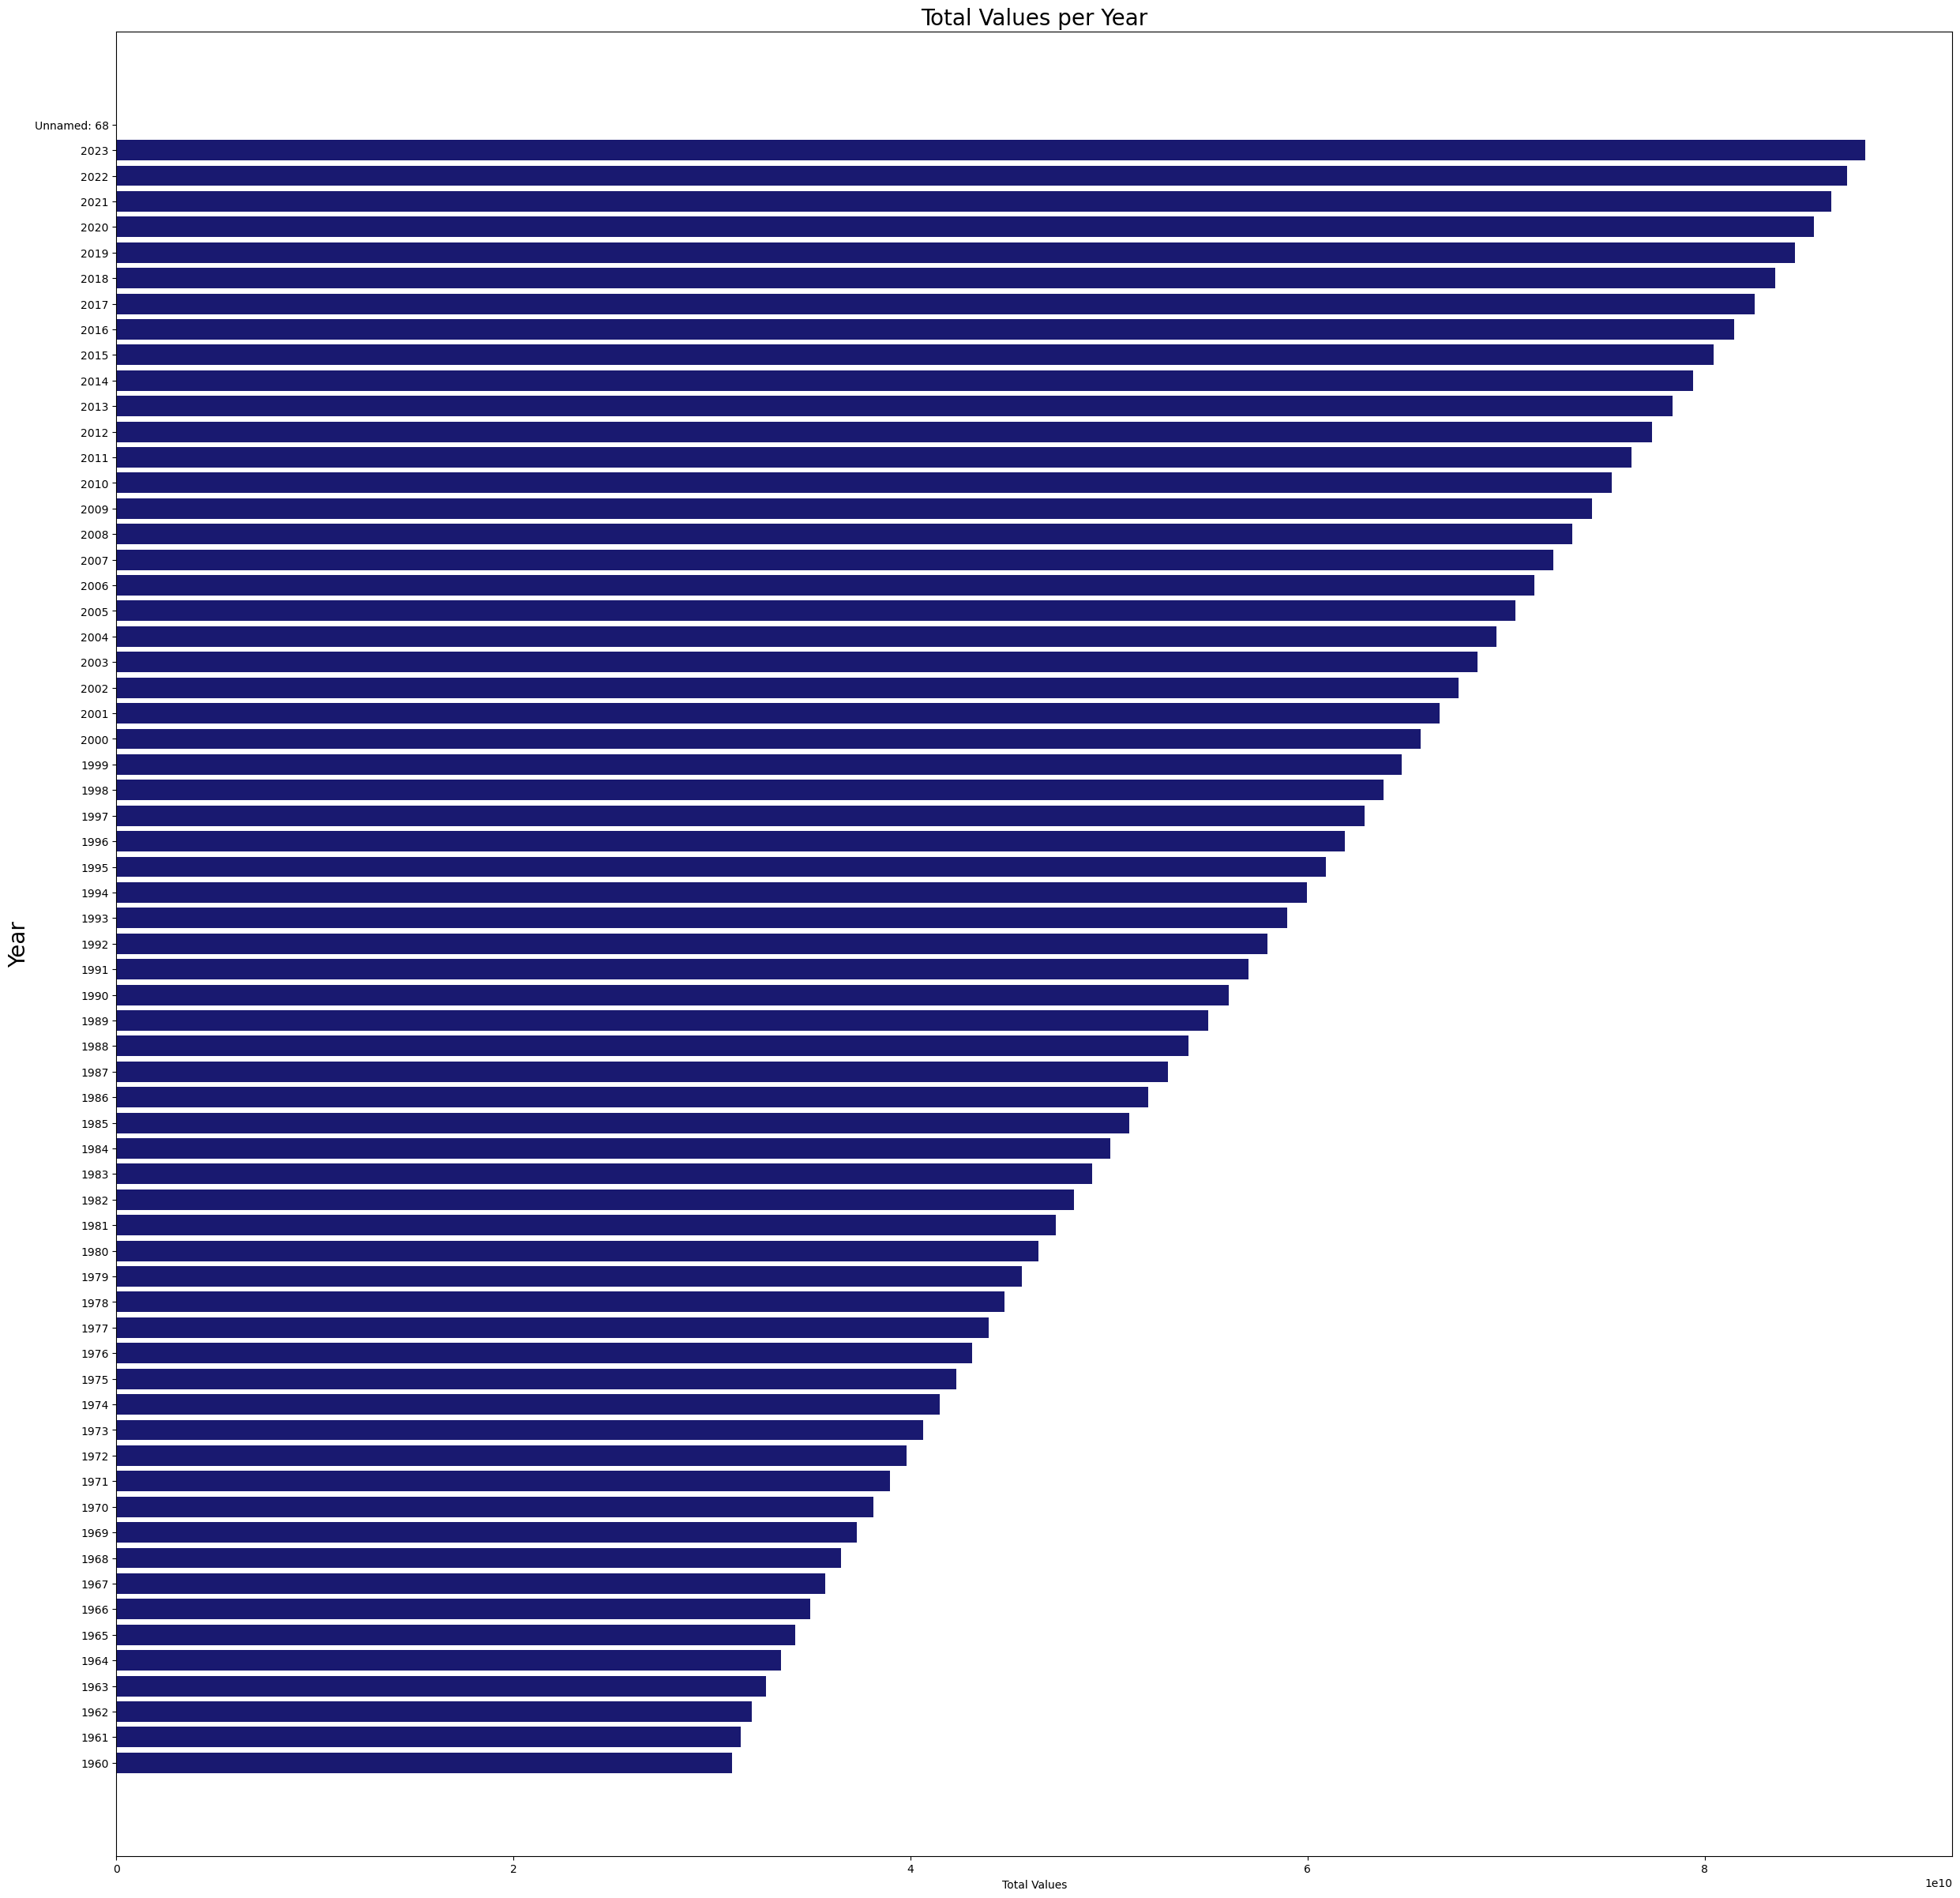

In [23]:
years = df.columns[1:]
total_values = df[years].sum()
plt.figure(figsize=(30, 30))
plt.barh(years, total_values,color='#191970')
plt.xlabel('Total Values')
plt.ylabel('Year', size=20)
plt.title('Total Values per Year', size=20)
plt.show()

In [24]:
country_by_1960 = df.sort_values(by='1960').head(20)
country_by_1960

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
225,Sint Maarten (Dutch part),2646.0,2888.0,3171.0,3481.0,3811.0,4161.0,4531.0,4930.0,5354.0,...,38825.0,38992.0,38615.0,38934.0,39648.0,40350.0,40708.0,40888.0,41163.0,NaN
147,St. Martin (French part),4135.0,4258.0,4388.0,4524.0,4666.0,4832.0,5044.0,5294.0,5497.0,...,35020.0,34811.0,34496.0,33852.0,33121.0,32553.0,31948.0,31791.0,32077.0,NaN
179,Nauru,4582.0,4753.0,4950.0,5198.0,5484.0,5804.0,6021.0,6114.0,6288.0,...,11185.0,11437.0,11682.0,11924.0,12132.0,12315.0,12511.0,12668.0,12780.0,NaN
245,Tuvalu,5404.0,5436.0,5471.0,5503.0,5525.0,5548.0,5591.0,5657.0,5729.0,...,10877.0,10852.0,10828.0,10865.0,10956.0,11069.0,11204.0,11312.0,11396.0,NaN
228,Turks and Caicos Islands,5604.0,5625.0,5633.0,5634.0,5642.0,5650.0,5652.0,5662.0,5668.0,...,36538.0,38246.0,39844.0,41487.0,43080.0,44276.0,45114.0,45703.0,46062.0,NaN
255,British Virgin Islands,7850.0,7885.0,7902.0,7919.0,7949.0,8018.0,8139.0,8337.0,8649.0,...,29366.0,29739.0,30060.0,30335.0,30610.0,30910.0,31122.0,31305.0,31538.0,NaN
52,Cayman Islands,8473.0,8626.0,8799.0,8985.0,9172.0,9366.0,9566.0,9771.0,9981.0,...,60911.0,62255.0,63581.0,64884.0,66134.0,67311.0,68136.0,68706.0,69310.0,NaN
164,Northern Mariana Islands,8702.0,8965.0,9252.0,9561.0,9890.0,10229.0,10577.0,10720.0,10440.0,...,51514.0,51133.0,50729.0,50304.0,49858.0,49587.0,49481.0,49551.0,49796.0,NaN
6,Andorra,9443.0,10216.0,11014.0,11839.0,12690.0,13563.0,14546.0,15745.0,17079.0,...,71746.0,72540.0,73837.0,75013.0,76343.0,77700.0,79034.0,79824.0,80088.0,NaN
188,Palau,9446.0,9639.0,9851.0,10076.0,10318.0,10563.0,10813.0,10992.0,11079.0,...,17794.0,17816.0,17837.0,17864.0,17916.0,17972.0,18024.0,18055.0,18058.0,NaN


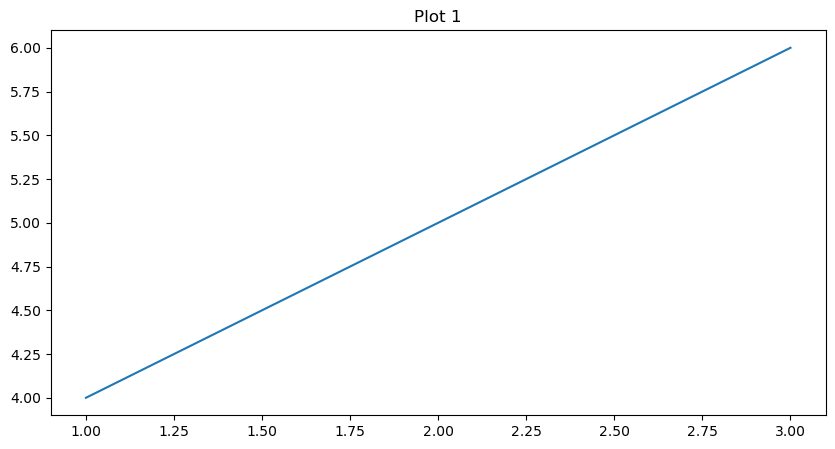

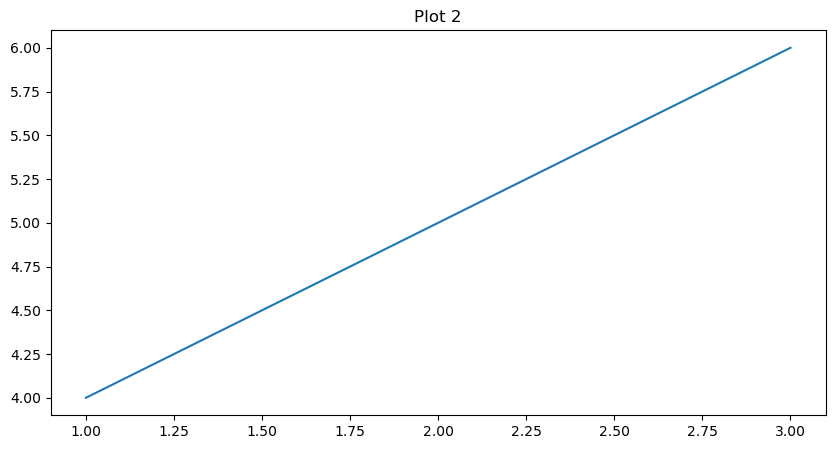

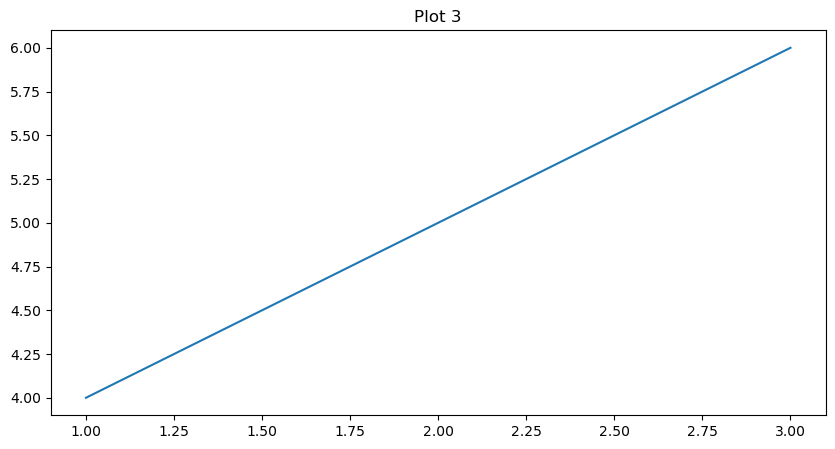

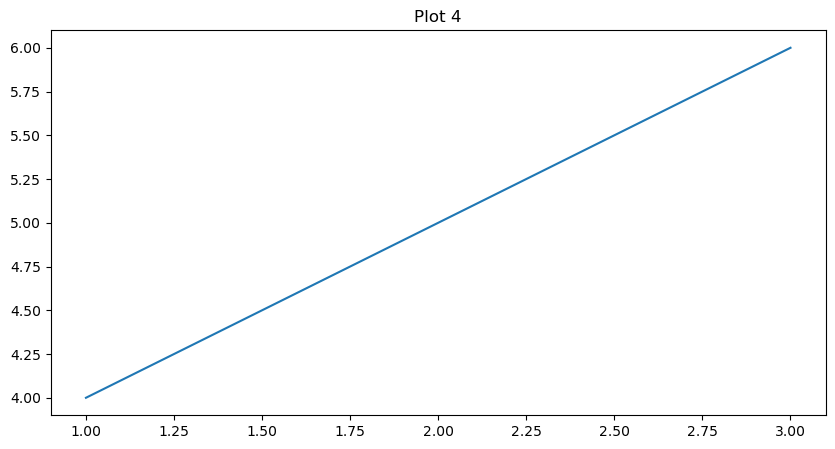

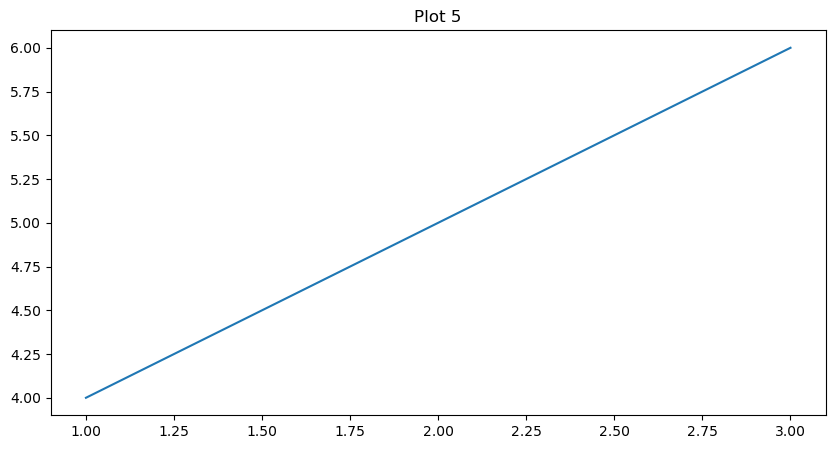

In [25]:
for i in range(5):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.plot([1, 2, 3], [4, 5, 6])
    ax.set_title(f'Plot {i+1}')
    plt.show()
